In [2]:
import geopandas as gpd
from rasterstats import zonal_stats
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
# Rutas al shapefile y al raster
shapefile_path = "/home/onyxia/work/Depot_Git/results/data/sample/Sample_BD_foret_T31TCJ.shp"
raster_path = "/home/onyxia/work/Depot_Git/results/data/img_pretraitees/masque_foret.tif"

# Cargar el shapefile usando geopandas
shapefile = gpd.read_file(shapefile_path)
print(shapefile.columns)

Index(['ID', 'CODE_TFV', 'TFV', 'TFV_G11', 'ESSENCE', 'classif_pi',
       'Code_pixel', 'classif_ob', 'Objet_code', 'geometry'],
      dtype='object')


In [4]:
# Calcular estadísticas zonales
stats = zonal_stats(
    shapefile,
    raster_path,
    stats=["count"],      # Cantidad de píxeles
    categorical=True,     # Agrupa los píxeles por categoría
    geojson_out=False     # Devuelve resultados como una lista
)

In [10]:
print(shapefile.columns)

Index(['ID', 'CODE_TFV', 'TFV', 'TFV_G11', 'ESSENCE', 'classif_pi',
       'Code_pixel', 'classif_ob', 'Objet_code', 'geometry'],
      dtype='object')


In [11]:
print(shapefile["classif_pi"].unique())

[None 'Chêne' 'Peupleraie' 'Autres feuillus' 'Autres Pin'
 'Pin laricio ou pin noir' 'Douglas' 'Robinier' 'Pin maritime'
 'Autres conifères autre que pin']


In [12]:
# Procesar estadísticas para obtener el conteo de píxeles por clase
results = []
for i, stat in enumerate(stats):
    clase = shapefile.iloc[i]["classif_pi"]  # Cambiar por el nombre del campo de clase
    if stat:
        for category, count in stat.items():
            results.append({"Clase": clase, "Categoría": category, "Pixeles": count})
    else:
        results.append({"Clase": clase, "Categoría": "N/A", "Pixeles": 0})

# Convertir resultados a DataFrame y agrupar por clase
df = pd.DataFrame(results)
grouped = df.groupby("Clase")["Pixeles"].sum().reset_index()

In [16]:
grouped


,Clase,Pixeles
0,Autres Pin,7820
1,Autres conifères autre que pin,2784
2,Autres feuillus,141616
3,Chêne,4442418
4,Douglas,43568
5,Peupleraie,107730
6,Pin laricio ou pin noir,104576
7,Pin maritime,33362
8,Robinier,43992


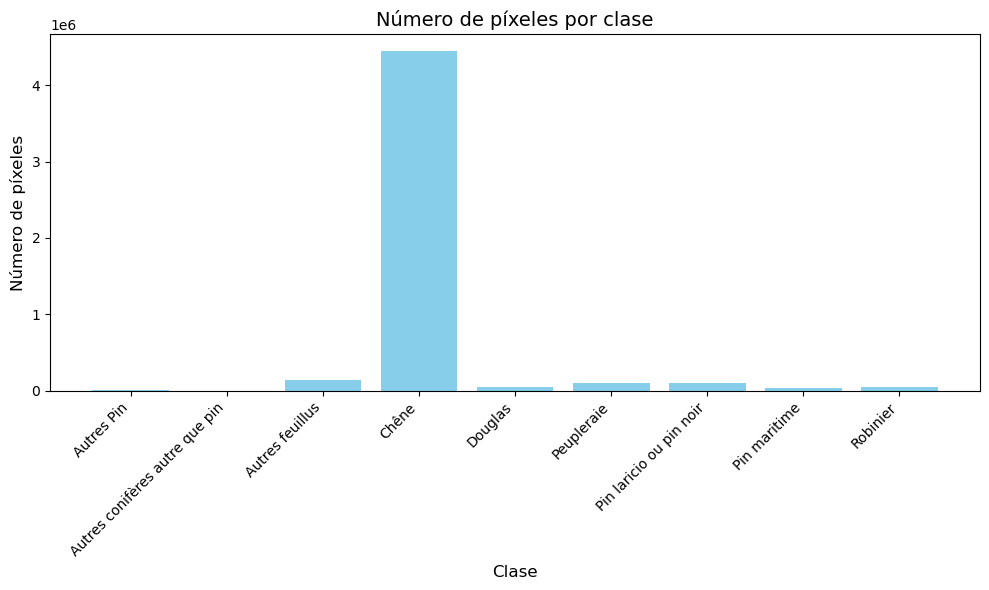

In [13]:
# Crear gráfico de barras con matplotlib
plt.figure(figsize=(10, 6))
plt.bar(grouped["Clase"], grouped["Pixeles"], color="skyblue")

# Añadir etiquetas y título
plt.xlabel("Clase", fontsize=12)
plt.ylabel("Número de píxeles", fontsize=12)
plt.title("Número de píxeles por clase", fontsize=14)
plt.xticks(rotation=45, ha="right")

# Guardar y mostrar el gráfico
plt.tight_layout()
#plt.savefig("diag_baton_nb_pix_by_class.png")
plt.show()